# Laboratorio 2

En este ejercicio se implementa regresion logistica para un dataset destinado a saber si una persona con determinados rasgos podria considerarse fumadora o no.

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot as plt

# Modulo de optimización de scipy
from scipy import optimize

import pandas as pd

import seaborn as sns

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# Correciones en el dataset

Realizamos el reemplazo de ciertos valores que se nos otorga en strings por ejemplo "gender" que arroja valores F para mujeres y M para hombres
una vez realizadas las correciones generamos un nuevo archivo "smoking_corregido.csv".

# NO CORRER ESTA SECCION PARA EVITAR ERRORES

In [ ]:

data = pd.read_csv('smoking.csv')

# reemplazamos valores de Y y N por 1 y 0 respectivamente y F y M por 1 y 0 respectivamente
data['oral'] = data['oral'].replace('Y', 1)
data['oral'] = data['oral'].replace('N', 0)
data['tartar'] = data['tartar'].replace('Y', 1)
data['tartar'] = data['tartar'].replace('N', 0)
data['gender'] = data['gender'].replace('F', 1)
data['gender'] = data['gender'].replace('M', 0)

# genera un archivo con los datos procesados
data.to_csv('smoking_corregido.csv', index=False)



# Realizamos la importacion y formateo de los datos

In [112]:

data = pd.read_csv('smoking_corregido.csv')

# el formato de los datos es el siguiente:
# gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking

# separamos los datos en dos conjuntos, uno para entrenamiento y otro para prueba el 80% de los datos se usaran para entrenamiento y el 20% para prueba
train_data = data.sample(frac=0.8, random_state=200)
test_data = data.drop(train_data.index)

# separamos los datos de entrenamiento en caracteristicas y etiquetas
train_features = train_data.copy()

# quitamos la columna de id de los datos de entrenamiento y prueba
train_features = train_features.drop('ID', axis=1)

X = train_features.drop('smoking', axis=1)
X = train_features.drop('oral', axis=1)
Y = train_features['smoking']

X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
47437,0,40,165,80,92.0,0.7,0.6,1.0,1.0,127.0,...,105.0,13.7,1.0,1.1,22.0,23.0,61.0,0,1,1
36622,0,20,170,70,77.0,1.6,1.6,1.0,1.0,117.0,...,134.0,15.0,1.0,1.1,25.0,20.0,34.0,0,1,1
11510,1,40,155,65,80.5,1.2,0.4,1.0,1.0,111.0,...,130.0,12.7,1.0,0.9,20.0,22.0,11.0,0,0,0
39947,0,65,155,65,88.0,0.9,0.9,1.0,1.0,135.0,...,147.0,17.0,1.0,1.1,27.0,24.0,51.0,0,1,0
50862,0,20,175,70,75.2,1.2,1.5,1.0,1.0,130.0,...,156.0,16.6,1.0,1.3,22.0,19.0,19.0,0,1,0


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [113]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [114]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [115]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: gender                   0.362998
age                     44.174709
height(cm)             164.682857
weight(kg)              65.889258
waist(cm)               82.049297
eyesight(left)           1.013734
eyesight(right)          1.006956
hearing(left)            1.025632
hearing(right)           1.026036
systolic               121.492638
relaxation              75.989922
fasting blood sugar     99.303340
Cholesterol            196.971787
triglyceride           126.748014
HDL                     57.278494
LDL                    115.073461
hemoglobin              14.624141
Urine protein            1.085739
serum creatinine         0.886562
AST                     26.105086
ALT                     26.982089
Gtp                     39.882839
dental caries            0.213786
tartar                   0.555842
smoking                  0.368407
dtype: float64
Desviación estandar calculada: gender                  0.480864
age                    12.072519
height(cm)           

<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [116]:

# agregamos una columna de unos a X

m, n = X.shape

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

X


array([[ 1.        , -0.75488613, -0.34580269, ..., -0.52145714,
         0.89390786,  1.30934722],
       [ 1.        , -0.75488613, -2.00245784, ..., -0.52145714,
         0.89390786,  1.30934722],
       [ 1.        ,  1.3247031 , -0.34580269, ..., -0.52145714,
        -1.11868352, -0.76373935],
       ...,
       [ 1.        ,  1.3247031 ,  0.48252489, ...,  1.91770313,
         0.89390786, -0.76373935],
       [ 1.        ,  1.3247031 ,  0.48252489, ..., -0.52145714,
         0.89390786, -0.76373935],
       [ 1.        ,  1.3247031 ,  0.0683611 , ..., -0.52145714,
        -1.11868352, -0.76373935]])

In [117]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [118]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.11190096e+00 -3.97776762e-01  2.37158990e-03  1.54358941e-01
 -3.39215353e-02 -3.64180040e-02 -7.67895880e-03 -5.87995890e-03
 -1.19570666e-02  2.56487951e-03 -5.93402514e-02  1.25015821e-02
  4.63378791e-02 -2.46678791e-02  1.46974377e-01 -6.31953622e-03
 -3.11048149e-02  1.72014125e-01 -5.81615019e-03 -2.03085974e-02
 -2.91889045e-02 -3.72732701e-02  1.50282669e-01  6.61646115e-02
  7.90635529e-02  3.47827815e+00]
con un costo de: 0.021157681995216122 


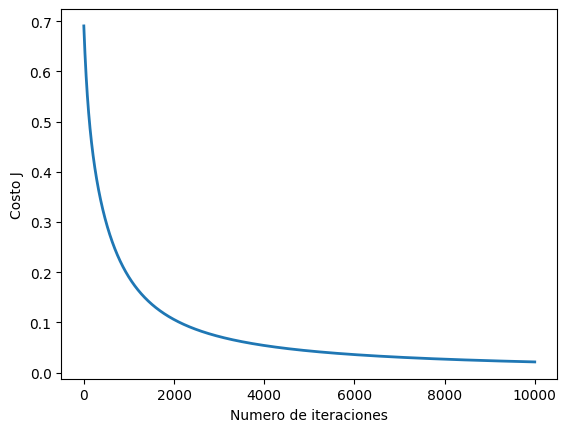

In [122]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(26)
theta, J_historico = descensoGradiente(theta, X, Y, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

print(f"con un costo de: { J_historico[-1]} ")


# Realizamos el testeo

In [127]:
# realizamos el testeo
# separamos los datos de prueba en caracteristicas y etiquetas

test_features = test_data.copy()
test_features = test_features.drop('ID', axis=1)
X_test = test_features.drop('smoking', axis=1)
X_test = test_features.drop('oral', axis=1)
Y_test = test_features['smoking']

# normalizamos los datos de prueba
X_test = (X_test - mu) / sigma

# agregamos una columna de unos a X
m, n = X_test.shape
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

Y_pred = []
for i in range(len(X_test)):
    Y_pred.append(sigmoid(X_test[i].dot(theta.T)))

Y_pred = np.array(Y_pred)

# mostrar 20 test con sus respectivos valores reales y predichos

for i in range(20):
    print(f"Valor real: {Y_test.iloc[i]} Valor predicho: {Y_pred[i]}")




Valor real: 1 Valor predicho: 0.9782489735816225
Valor real: 0 Valor predicho: 0.03343205635417554
Valor real: 0 Valor predicho: 0.007079057141322325
Valor real: 0 Valor predicho: 0.04801402583489669
Valor real: 1 Valor predicho: 0.9863255311292553
Valor real: 1 Valor predicho: 0.9791037953456762
Valor real: 0 Valor predicho: 0.0473795758557044
Valor real: 1 Valor predicho: 0.9762051236423028
Valor real: 0 Valor predicho: 0.008398467760252383
Valor real: 1 Valor predicho: 0.9778822838189983
Valor real: 0 Valor predicho: 0.02321305745200301
Valor real: 1 Valor predicho: 0.9804002071427442
Valor real: 0 Valor predicho: 0.032138966114008
Valor real: 1 Valor predicho: 0.9556450524567405
Valor real: 0 Valor predicho: 0.009522465089580713
Valor real: 1 Valor predicho: 0.9760516187189967
Valor real: 1 Valor predicho: 0.9777285965635605
Valor real: 0 Valor predicho: 0.024918477322887208
Valor real: 1 Valor predicho: 0.977505226016329
Valor real: 0 Valor predicho: 0.01125461849433154


Ahora lo mostramos con las y predichas redondeadas a 1 o 0


In [128]:
# umbral para clasificar los valores
umbral = 0.5

# convertimos los valores predichos a 1 si es mayor al umbral y 0 si es menor
Y_pred = (Y_pred > umbral).astype(int)

# mostrar 20 test con sus respectivos valores reales y predichos
for i in range(20):
    print(f"Valor real: {Y_test.iloc[i]} Valor predicho: {Y_pred[i]}")

Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 0 Valor predicho: 0
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0


In [129]:
# calculamos la precisión del modelo
precision = np.mean(Y_pred == Y_test) * 100
print(f'La precisión del modelo es del {precision}%')


La precisión del modelo es del 100.0%
